In [1]:
import pandas as pd, numpy as np, seaborn as sbn, matplotlib.pyplot as plt

from Modules import utils as utl
from Modules import data_exploration as de
from Modules import machine_learning as ml
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import metrics
import pickle
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

### Loading and cleaning all finalist data to only keep relevant columns (final_draw_position, final_televote_points, final_jury_points, final_place)

In [3]:
csv_file_path = 'Data/finalists_cleaned.csv'
eurovision_df = pd.read_csv(csv_file_path, encoding='windows-1252')

In [4]:
eurovision_df

,year,final_draw_position,country,style,final_televote_points,final_jury_points,final_televote_votes,final_jury_votes,final_place,final_total_points
0,2023,20,Norway,Pop,216.0,52.0,36.0,11.0,5.0,268.0
1,2023,5,Serbia,Pop,16.0,14.0,4.0,6.0,24.0,30.0
2,2023,2,Portugal,Pop,16.0,43.0,3.0,9.0,23.0,59.0
3,2023,25,Croatia,Pop,112.0,11.0,20.0,2.0,13.0,123.0
4,2023,3,Switzerland,Ballad,31.0,61.0,10.0,15.0,20.0,92.0
...,...,...,...,...,...,...,...,...,...,...
353,2009,3,France,Ballad,54.0,164.0,NaN,NaN,8.0,218.0
354,2009,10,Russia,Ballad,118.0,67.0,NaN,NaN,11.0,185.0
355,2009,17,Germany,Pop,18.0,73.0,NaN,NaN,20.0,91.0
356,2009,23,United Kingdom,Ballad,105.0,223.0,NaN,NaN,5.0,328.0


In [5]:
dropped_columns = ['style', 'final_televote_votes', 'final_jury_votes', 'country' ]
jury_televote = eurovision_df.drop(columns=dropped_columns)

In [6]:
jury_televote

,year,final_draw_position,final_televote_points,final_jury_points,final_place,final_total_points
0,2023,20,216.0,52.0,5.0,268.0
1,2023,5,16.0,14.0,24.0,30.0
2,2023,2,16.0,43.0,23.0,59.0
3,2023,25,112.0,11.0,13.0,123.0
4,2023,3,31.0,61.0,20.0,92.0
...,...,...,...,...,...,...
353,2009,3,54.0,164.0,8.0,218.0
354,2009,10,118.0,67.0,11.0,185.0
355,2009,17,18.0,73.0,20.0,91.0
356,2009,23,105.0,223.0,5.0,328.0


In [7]:
jury_televote.isnull().sum()

year                      0
final_draw_position       0
final_televote_points    32
final_jury_points        32
final_place               0
final_total_points        0
dtype: int64

In [8]:
# Show the rows with any null values in the jury_televote DataFrame
null_rows = jury_televote[jury_televote.isnull().any(axis=1)]

# Display the rows with null values
null_rows

,year,final_draw_position,final_televote_points,final_jury_points,final_place,final_total_points
212,2014,24,NaN,NaN,2.0,0.0
231,2013,7,NaN,NaN,20.0,0.0
232,2013,18,NaN,NaN,1.0,0.0
233,2013,10,NaN,NaN,5.0,0.0
234,2013,22,NaN,NaN,3.0,0.0
235,2013,13,NaN,NaN,9.0,0.0
236,2013,2,NaN,NaN,22.0,0.0
237,2013,8,NaN,NaN,16.0,0.0
238,2013,3,NaN,NaN,11.0,0.0
239,2013,26,NaN,NaN,26.0,0.0


In [9]:
# Impute missing values with the mean of each column - otherwise we would have to delete all data from 2013 - as there is no official jury/televote split result available anywhere:(
imputer = SimpleImputer(strategy='mean')
jury_televote_imputed = pd.DataFrame(imputer.fit_transform(jury_televote), columns=jury_televote.columns)

# Display the first few rows
jury_televote_imputed.head()


,year,final_draw_position,final_televote_points,final_jury_points,final_place,final_total_points
0,2023.0,20.0,216.0,52.0,5.0,268.0
1,2023.0,5.0,16.0,14.0,24.0,30.0
2,2023.0,2.0,16.0,43.0,23.0,59.0
3,2023.0,25.0,112.0,11.0,13.0,123.0
4,2023.0,3.0,31.0,61.0,20.0,92.0


In [10]:
jury_televote.head() # just to check so that the imputed version matches up

,year,final_draw_position,final_televote_points,final_jury_points,final_place,final_total_points
0,2023,20,216.0,52.0,5.0,268.0
1,2023,5,16.0,14.0,24.0,30.0
2,2023,2,16.0,43.0,23.0,59.0
3,2023,25,112.0,11.0,13.0,123.0
4,2023,3,31.0,61.0,20.0,92.0


In [11]:
# the current columns
print(jury_televote_imputed.columns)


Index(['year', 'final_draw_position', 'final_televote_points',
       'final_jury_points', 'final_place', 'final_total_points'],
      dtype='object')


In [12]:
# Check if there are any missing values
print(jury_televote_imputed.isnull().sum())


year                     0
final_draw_position      0
final_televote_points    0
final_jury_points        0
final_place              0
final_total_points       0
dtype: int64


#### Graphical models to showcase the difference between the performance order/running order's influence on televote points vs jury points

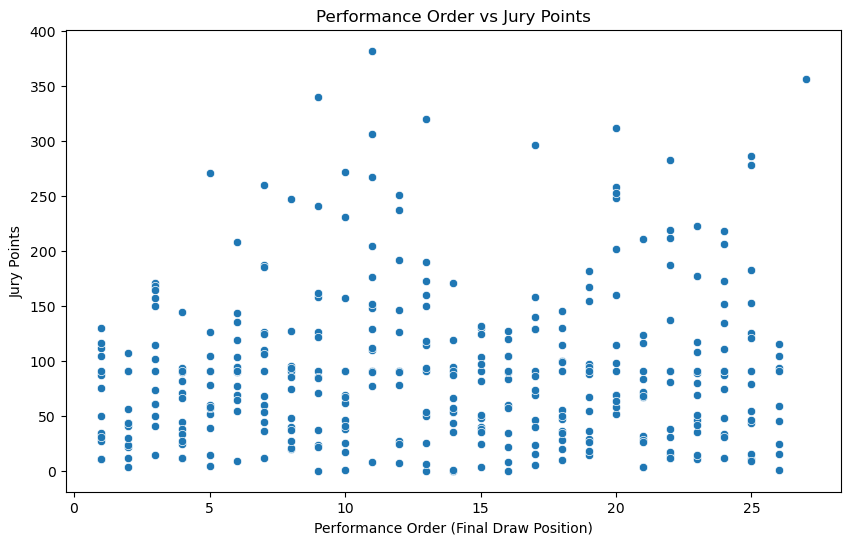

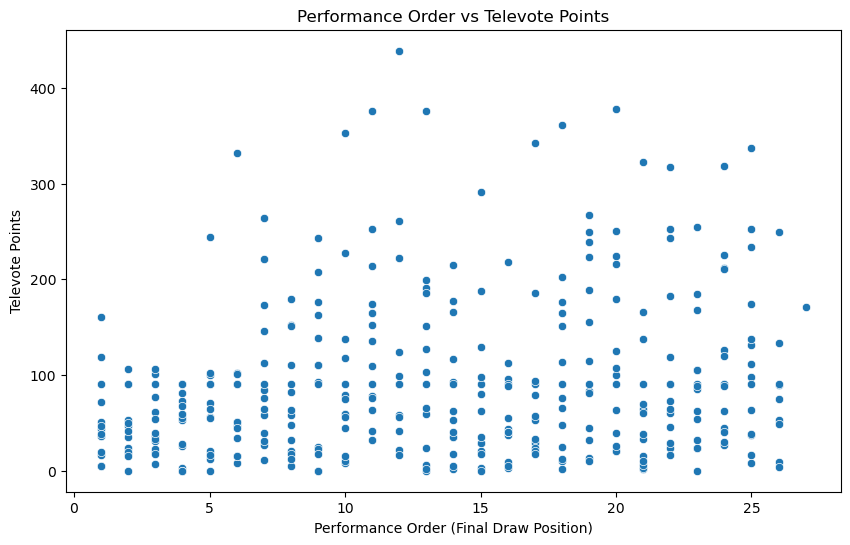

In [14]:
# Scatter plot of Performance Order vs Jury Points
plt.figure(figsize=(10, 6))
sbn.scatterplot(data=jury_televote_imputed, x='final_draw_position', y='final_jury_points')
plt.title('Performance Order vs Jury Points')
plt.xlabel('Performance Order (Final Draw Position)')
plt.ylabel('Jury Points')
plt.show()

# Scatter plot of Performance Order vs Televote Points
plt.figure(figsize=(10, 6))
sbn.scatterplot(data=jury_televote_imputed, x='final_draw_position', y='final_televote_points')
plt.title('Performance Order vs Televote Points')
plt.xlabel('Performance Order (Final Draw Position)')
plt.ylabel('Televote Points')
plt.show()

In [15]:
# Calculate the correlation between Performance Order and Jury Points
jury_corr = jury_televote_imputed[['final_draw_position', 'final_jury_points']].corr()
print("Correlation between Performance Order and Jury Points:")
print(jury_corr)

# Calculate the correlation between Performance Order and Televote Points
televote_corr = jury_televote_imputed[['final_draw_position', 'final_televote_points']].corr()
print("Correlation between Performance Order and Televote Points:")
print(televote_corr)


Correlation between Performance Order and Jury Points:
                     final_draw_position  final_jury_points
final_draw_position              1.00000            0.08098
final_jury_points                0.08098            1.00000
Correlation between Performance Order and Televote Points:
                       final_draw_position  final_televote_points
final_draw_position               1.000000               0.200002
final_televote_points             0.200002               1.000000


##### From this correlation map, we get two important values: 0.08 for jury and 0.2 for televote. So that means the televote is way more influenced (actually twice the amount!) by the running order than the juries as we assumed in our hypothesis. 

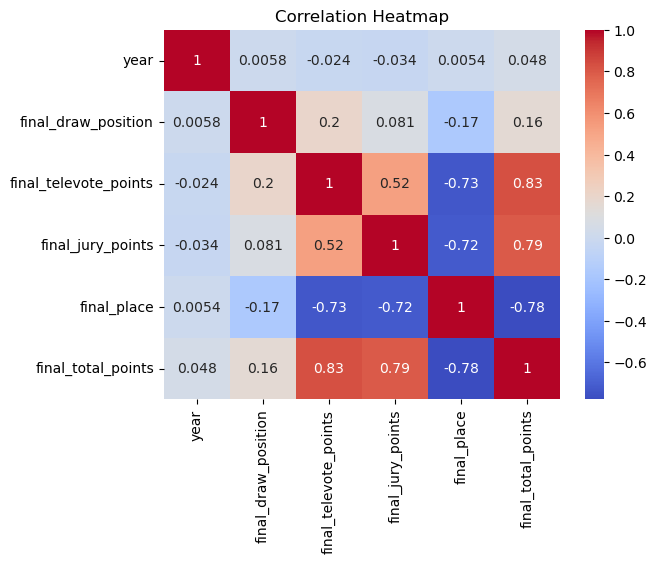

In [17]:
de.vs.correlation_heatmap(jury_televote_imputed)

#### Boxplots to visualize the spread of observations

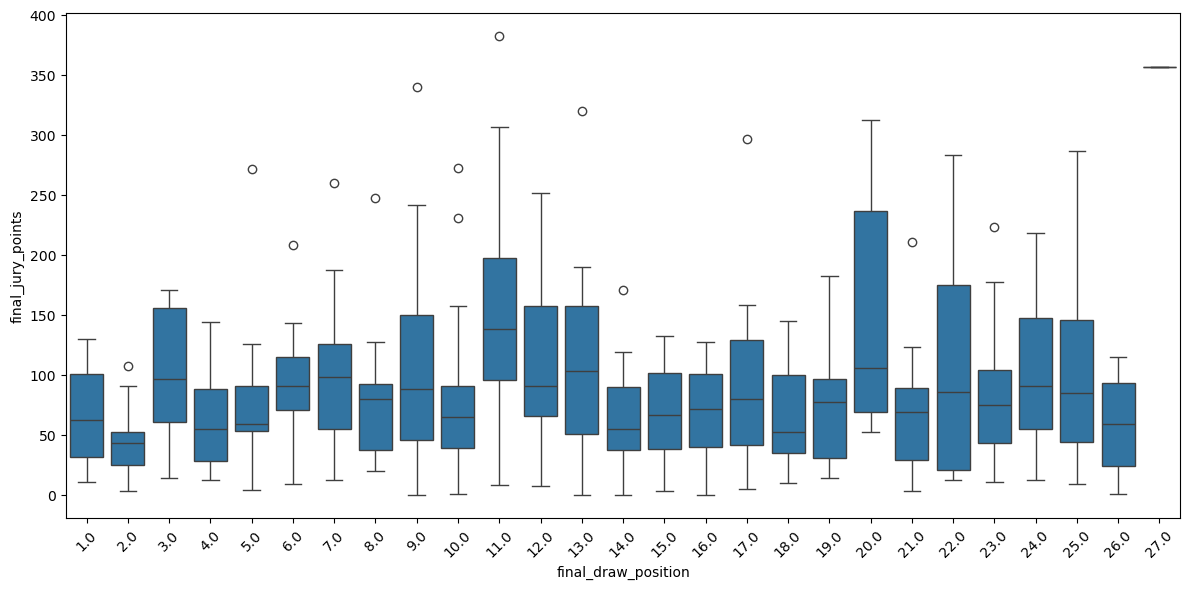

In [19]:
# Create a boxplot with seaborn
plt.figure(figsize=(12, 6))  # Increase figure size for better space

sbn.boxplot(x='final_draw_position', y='final_jury_points', data=jury_televote_imputed)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees

# Adjust layout to ensure that labels fit within the figure
plt.tight_layout()

# Show the plot
plt.show()

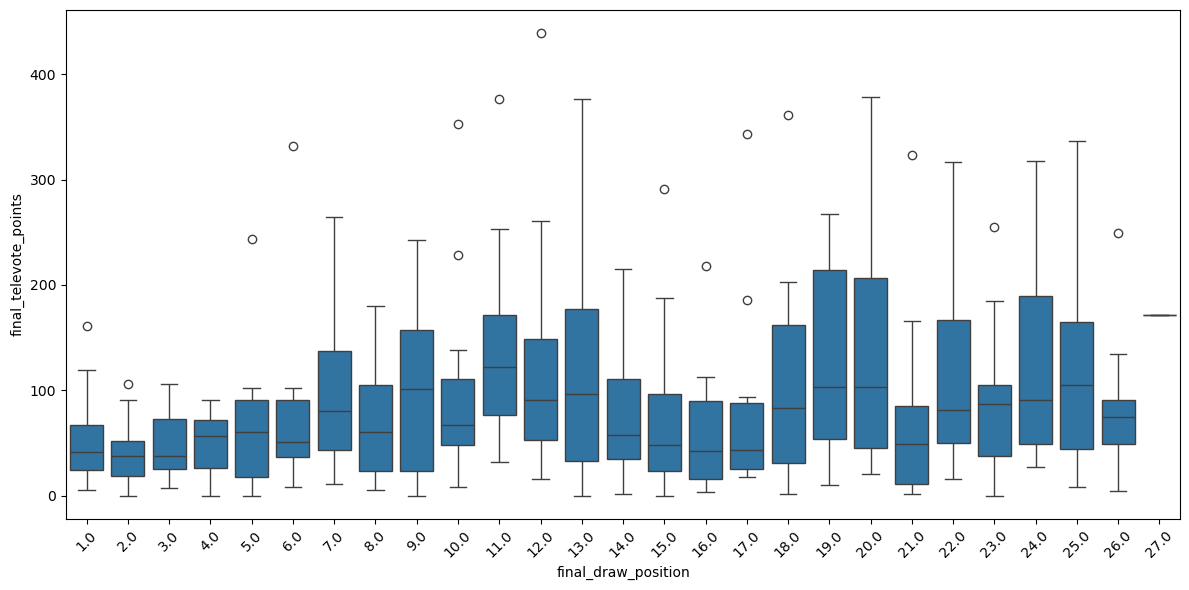

In [20]:
# Create a boxplot with seaborn
plt.figure(figsize=(12, 6))  # Increase figure size for better space

sbn.boxplot(x='final_draw_position', y='final_televote_points', data=jury_televote_imputed)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees

# Adjust layout to ensure that labels fit within the figure
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 600x400 with 0 Axes>

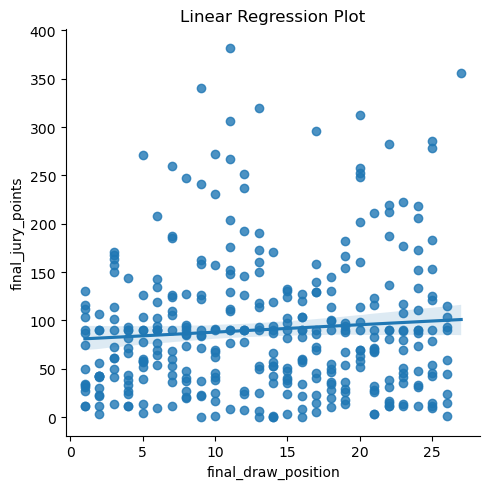

In [21]:
de.vs.lmplot(jury_televote_imputed, 'final_draw_position', 'final_jury_points')
# the smaller the final_place - the better

<Figure size 600x400 with 0 Axes>

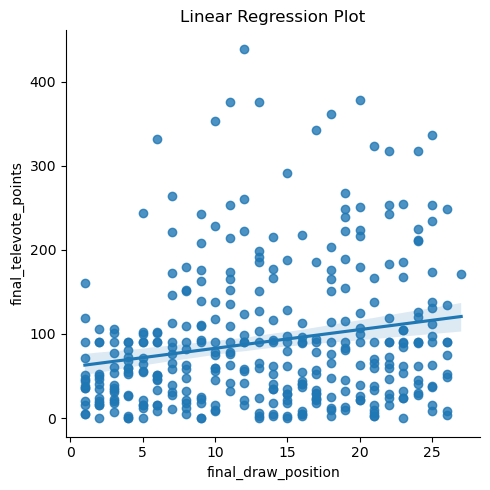

In [22]:
de.vs.lmplot(jury_televote_imputed, 'final_draw_position', 'final_televote_points')
# the smaller the final_place - the better

#### As seen on the linear regression models above, the jury is slightly influenced by the running order with a slight upwards slope, while the televote is way more influenced as pictured on the regression slope being steeper the later a song performs. But generally the tendency is the later a song performs, the more points it will typically get.

### Using normalization to refine data for machine learning

#### Using StandardScaler as the data doesn't need to account for extreme outliers

In [26]:
from sklearn.preprocessing import StandardScaler
X = jury_televote_imputed.drop(columns=['final_jury_points', 'final_televote_points', 'final_total_points'])  # Features


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
print(X.columns)

Index(['year', 'final_draw_position', 'final_place'], dtype='object')


In [28]:
y_jury = jury_televote_imputed['final_jury_points']
y_televote = jury_televote_imputed['final_televote_points']

### ** Why I ended up not using PCA as I had intended **

In [30]:
#X_scaled_test = StandardScaler().fit_transform(X)
#pca = PCA(n_components=2)
#X_pca = pca.fit_transform(X_scaled_test)

# Creating DataFrame for PCA components
#pcadf = pd.DataFrame(data = X_pca, columns = ['pc1', 'pc2'])

# Adding target variable (final_televote_points)
#pcadf['final_televote_points'] = jury_televote['final_televote_points']

In [31]:
# Visualize the relationship between PCA components and the target variable (e.g., jury points)
#plt.figure(figsize=(10, 6))
#sbn.scatterplot(x=pcadf['pc1'], y=pcadf['pc2'], label='PC1 vs PC2', color='blue')
#sbn.scatterplot(x=pcadf['pc1'], y=pcadf['pc3'], label='PC1 vs PC3', color='green')
#sbn.scatterplot(x=pcadf['pc2'], y=pcadf['pc3'], label='PC2 vs PC3', color='red')
#plt.title('PCA')
#plt.xlabel('Principal Components 1')
#plt.ylabel('pc 2')
#plt.legend()
#plt.show()

In [32]:

# Test without PCA (just StandardScaler)
#y = jury_televote_imputed['final_televote_points']
#X_scaled_test = StandardScaler().fit_transform(X)


#X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
#model = LinearRegression()
#model.fit(X_train_t, y_train_t)

# Evaluate the model without PCA
#y_pred = model.predict(X_test_t)
#r2 = metrics.r2_score(y_test_t, y_pred)
#print(f"R² without PCA: {r2}")

# Now test with PCA (StandardScaler + PCA)
#X_scaled_test = StandardScaler().fit_transform(X)
#pca = PCA(n_components=2)
#X_pca = pca.fit_transform(X_scaled_test)

#X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_pca, y, test_size=0.2, random_state=42)
#model.fit(X_train_t, y_train_t)

# Evaluate the model with PCA
#y_pred = model.predict(X_test_t)
#r2_with_pca = metrics.r2_score(y_test_t, y_pred)
#print(f"R² with PCA: {r2_with_pca}")


##### As the R-squared values always are the same with or without usage of PCA (like this: R² without PCA: 0.6229190368002047, R² with PCA: 0.6229190368002047), I've decided to drop PCA, and instead only use normalization as that does the job of scaling the data to make it as comparable as possible in the final model. We will also only have 3 columns in total in each jury or televote model (final_draw_position, final_televote_points or final_jury_points, final_place) and it will therefore not improve much to replace these three columns with the new PCA columns instead.

### Training and testing machine learning

#### Only random forest

In [36]:
#X_jury_train, X_jury_test, y_jury_train, y_jury_test = train_test_split(X_scaled, y_jury)

# Initialize Random Forest model
#rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
#rf_model.fit(X_jury_train, y_jury_train)

# Evaluate model performance
#y_jury_pred = rf_model.predict(X_jury_test)
#r2_rf = metrics.r2_score(y_jury_test, y_jury_pred)
#print(f"R² with Random Forest: {r2_rf}")


In [37]:
#X_televote_train, X_televote_test, y_televote_train, y_televote_test = train_test_split(X_scaled, y_televote)

# Initialize Random Forest model
#rf_model_t = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
#rf_model_t.fit(X_televote_train, y_televote_train)

# Evaluate model performance
#y_televote_pred = rf_model_t.predict(X_televote_test)
#r2_rf = metrics.r2_score(y_televote_test, y_televote_pred)
#print(f"R² with Random Forest: {r2_rf}")


#### Only linear regression

In [39]:
#X_jury_train, X_jury_test, y_jury_train, y_jury_test = train_test_split(X_scaled, y_jury)

#jury_model = ml.train_linear_reg_model(X_jury_train, y_jury_train)

#ml.evaluate_model(jury_model, X_jury_test, y_jury_test)

In [40]:
#X_televote_train, X_televote_test, y_televote_train, y_televote_test = train_test_split(X_scaled, y_televote)

#televote_model = ml.train_linear_reg_model(X_televote_train, y_televote_train)

#ml.evaluate_model(televote_model, X_televote_test, y_televote_test)

#### Both random forest and linear regression stacked in one model

In [42]:
## Jury points vers. (combining these two regression types)

X_jury_train, X_jury_test, y_jury_train, y_jury_test = train_test_split(X_scaled, y_jury)

# Define base models
base_learners = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('lr', LinearRegression())
]

# Define and train stacking model
stacking_model_jury = StackingRegressor(estimators=base_learners, final_estimator=LinearRegression())
stacking_model_jury.fit(X_jury_train, y_jury_train)

# Predict with the stacking model
y_jury_predicted = stacking_model_jury.predict(X_jury_test)


r2_stack_jury = metrics.r2_score(y_jury_test, y_jury_predicted)
print(f"R² score with Stacking Model: {r2_stack_jury}")


R² score with Stacking Model: 0.5535253738896077


In [43]:
## Televote points vers. (combining these two regression types)

X_televote_train, X_televote_test, y_televote_train, y_televote_test = train_test_split(X_scaled, y_televote)

# Define base models
base_learners = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('lr', LinearRegression())
]

# Define and train stacking model
stacking_model_televote = StackingRegressor(estimators=base_learners, final_estimator=LinearRegression())
stacking_model_televote.fit(X_televote_train, y_televote_train)

# Predict with the stacking model
y_televote_predicted = stacking_model_televote.predict(X_televote_test)


r2_stack_televote = metrics.r2_score(y_televote_test, y_televote_predicted)
print(f"R² score with Stacking Model: {r2_stack_televote}")


R² score with Stacking Model: 0.6812458928300071


### Margin of errors of the stacking model and visualization of actual vs predicted points

Mean Absolute Error (MAE) =  34.284690127274565
Mean Squared Error (MSE) =  2253.4661819393036
Root Mean Squared Error (RMSE) =  47.47068760761006
R2 (R-squared) score =  0.5535253738896077
Explained variance score =  0.5547
Regression Line Coefficient (a) = 0.6290


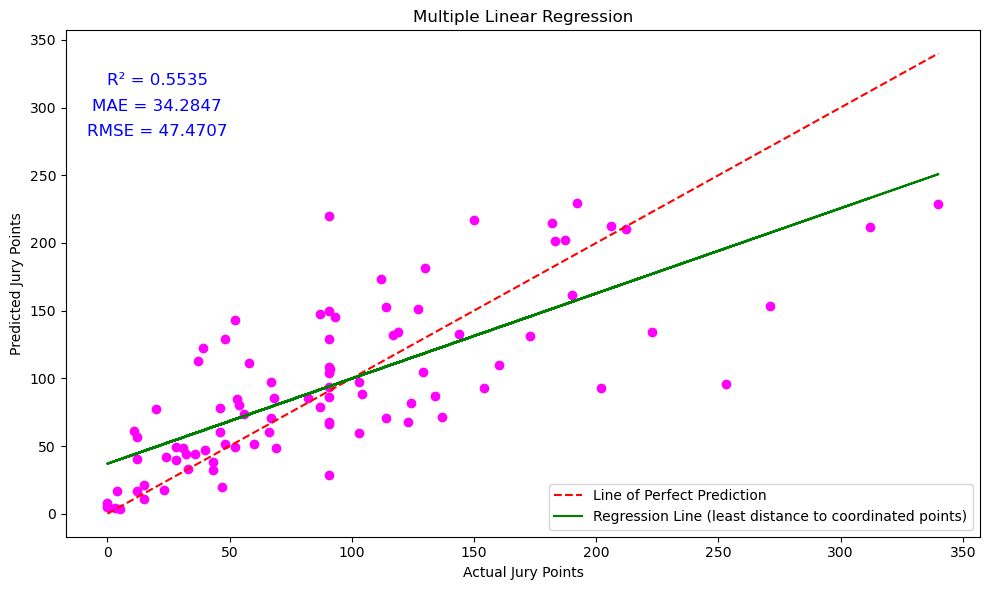

In [45]:
# JURY ERROR MARGIN
print("Mean Absolute Error (MAE) = ", metrics.mean_absolute_error(y_jury_test, y_jury_predicted))

print("Mean Squared Error (MSE) = ", metrics.mean_squared_error(y_jury_test, y_jury_predicted))


# calculate RMSE using scikit-learn
print("Root Mean Squared Error (RMSE) = ", np.sqrt(metrics.mean_squared_error(y_jury_test, y_jury_predicted)))


# R-squared
r2_jury_score = metrics.r2_score(y_jury_test, y_jury_predicted)
print ("R2 (R-squared) score = ", r2_jury_score)
eV_jury = round(metrics.explained_variance_score(y_jury_test, y_jury_predicted), 4)
print('Explained variance score = ',eV_jury )



# Visualize the regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_jury_test, y_jury_predicted, color='magenta')
plt.title('Multiple Linear Regression')
plt.xlabel('Actual Jury Points')  # Label for x-axis
plt.ylabel('Predicted Jury Points')  # Label for y-axis

# Plot the Line of Perfect Prediction (diagonal line y = x)
plt.plot([min(y_jury_test), max(y_jury_test)], [min(y_jury_test), max(y_jury_test)], color='red', linestyle='--', label='Line of Perfect Prediction')

# Plot the regression line (best fit)
reg_j = LinearRegression()
reg_j.fit(y_jury_test.values.reshape(-1, 1), y_jury_predicted)  # Fit the model to the actual vs predicted
jury_best_fit = reg_j.predict(y_jury_test.values.reshape(-1, 1))

# Coefficients (a)
a_j = reg_j.coef_[0]  # This is the coefficient (slope)
print(f'Regression Line Coefficient (a) = {a_j:.4f}')

plt.plot(y_jury_test, jury_best_fit, color='green', label='Regression Line (least distance to coordinated points)')
# Adding text to display the R-squared value on the plot
plt.text(0.1, 0.9, f'R² = {r2_jury_score:.4f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='blue')

# Adding other metrics to the plot
plt.text(0.1, 0.85, f'MAE = {metrics.mean_absolute_error(y_jury_test, y_jury_predicted):.4f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.1, 0.80, f'RMSE = {np.sqrt(metrics.mean_squared_error(y_jury_test, y_jury_predicted)):.4f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='blue')

# Show the plot
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Mean Absolute Error (MAE) =  35.555201930562184
Mean Squared Error (MSE) =  2316.731927354711
Root Mean Squared Error (RMSE) =  48.132441527048165
R2 (R-squared) score =  0.6812458928300071
Explained variance score =  0.6815
Regression Line Coefficient (a) = 0.7095


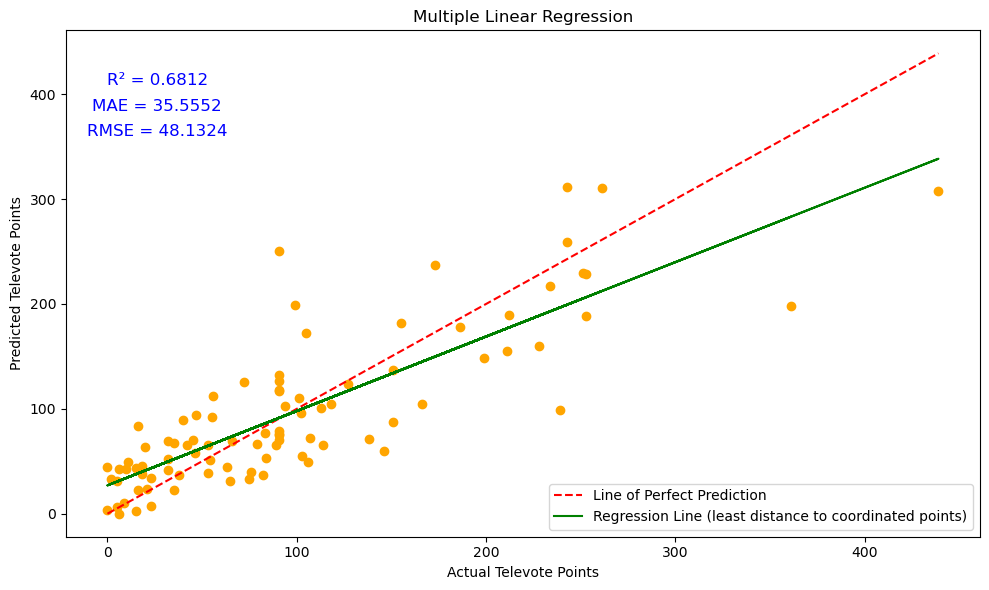

In [46]:
# TELEVOTE ERROR MARGIN
print("Mean Absolute Error (MAE) = ", metrics.mean_absolute_error(y_televote_test, y_televote_predicted))

print("Mean Squared Error (MSE) = ", metrics.mean_squared_error(y_televote_test, y_televote_predicted))


# calculate RMSE using scikit-learn
print("Root Mean Squared Error (RMSE) = ", np.sqrt(metrics.mean_squared_error(y_televote_test, y_televote_predicted)))


# R-squared
r2_televote_score = metrics.r2_score(y_televote_test, y_televote_predicted)
print ("R2 (R-squared) score = ", r2_televote_score)
eV_televote = round(metrics.explained_variance_score(y_televote_test, y_televote_predicted), 4)
print('Explained variance score = ',eV_televote )



# Visualize the regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_televote_test, y_televote_predicted, color='orange')
plt.title('Multiple Linear Regression')
plt.xlabel('Actual Televote Points')  # Label for x-axis
plt.ylabel('Predicted Televote Points')  # Label for y-axis

# Plot the Line of Perfect Prediction (diagonal line y = x)
plt.plot([min(y_televote_test), max(y_televote_test)], [min(y_televote_test), max(y_televote_test)], color='red', linestyle='--', label='Line of Perfect Prediction')

# Plot the regression line (best fit)
reg_t = LinearRegression()
reg_t.fit(y_televote_test.values.reshape(-1, 1), y_televote_predicted)  # Fit the model to the actual vs predicted
televote_best_fit = reg_t.predict(y_televote_test.values.reshape(-1, 1))

# Coefficients (a)
a_t = reg_t.coef_[0]  # This is the coefficient (slope)
print(f'Regression Line Coefficient (a) = {a_t:.4f}')

plt.plot(y_televote_test, televote_best_fit, color='green', label='Regression Line (least distance to coordinated points)')
# Adding text to display the R-squared value on the plot
plt.text(0.1, 0.9, f'R² = {r2_televote_score:.4f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='blue')

# Adding other metrics to the plot
plt.text(0.1, 0.85, f'MAE = {metrics.mean_absolute_error(y_televote_test, y_televote_predicted):.4f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.1, 0.80, f'RMSE = {np.sqrt(metrics.mean_squared_error(y_televote_test, y_televote_predicted)):.4f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='blue')

# Show the plot
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### To sum up this section: I originally started this out with the intent of doing normalization and thereafter PCA. I found out that PCA was not very useful for a model only containing 1 column for the X value (final_draw_position). I wanted to do more than just simple linear regression with a y-value and a x-value, like using normalization to make more accurate predictions. So I tried to solely focus on using the StandardScaler but the r-squared result still remained negative - which means that the predicted results have no correlance with the real results in any way. I also tested the Linear Regression algorithm and the Random Forest algorithm separately - but it didn't fix the issue. So I ended up incorporating the columns 'final_place' and 'year' in X in addition to 'final_draw_position', while keeping either 'final_jury_points' or 'final_televote_points' as y, depending on whether we're working on a jury or a televote model. The reason for this decision is that neither Linear Regression, Random Forest, nor even a Stacking Regressor approach can avoid negative R-squared values without including 'final_place'. 
#### Although it might not be the optimal approach, as 'final_place' could potentially influence the results by essentially predicting the final ranking itself, I have included it because it significantly improves the model's performance in R-squared - explaining typically between 50-70% of the result variance, which is quite good. The final place is included to help better predict the actual results, but this might be misleading since the placement is being used as a predictor for placement. Still, without 'final_place', the models did not perform well, leading to negative R-squared values, which makes this model practically unusable for making predictions otherwise.

In [48]:
y_televote_train.head()

90      47.0
204    171.0
312     76.0
17      59.0
298     39.0
Name: final_televote_points, dtype: float64

In [49]:
y_televote_test.head()

148      5.0
331    151.0
135     32.0
6       76.0
108     23.0
Name: final_televote_points, dtype: float64

In [50]:
y_jury_train.head()

163     69.0
190     34.0
317     57.0
210    112.0
194     48.0
Name: final_jury_points, dtype: float64

In [51]:
y_jury_test.head()

117     28.0
191     37.0
339     12.0
295    117.0
124    114.0
Name: final_jury_points, dtype: float64

#### From this analysis we can conclude that generally the televote favours songs with a later running order, while for jury it is only very slightly influenced towards a later running order. We can tell by the graph of their linear regressions, their correlation with final_draw_position having a negative coefficent - representing the higher amount of points you receive, the lower (better) your placing becomes. We can tell by the coefficient 'a' of these green linear regression lines in the graphs right above - where if the jury point coefficient is 0.6290 and the televote point coefficient is 0.7095 meaning that in this case the televote points are more dependent on a later running order, while the jury points are slightly less dependent on a later position - but is not independent of it. 